In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense,Dropout,Input,Dense
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
def load_data():
  (x_train,y_train),(x_test,y_test)=mnist.load_data()
  x_train = (x_train.astype(np.float32) - 127.5)/127.5
  x_train=x_train.reshape(60000,784)
  return (x_train,y_train,x_test,y_test)


In [3]:
X_train,y_train,X_test,y_test=load_data()
print(X_train.shape)
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

(60000, 784)


In [4]:
def create_generator():
  inp=Input(shape=(100,))
  x=Dense(250)(inp)
  x=LeakyReLU(0.1)(x)
  x=Dense(1200)(x)
  x=LeakyReLU(0.2)(x)
  
  x=Dense(784,activation='tanh')(x)
  gen=Model(inp,x)
  gen.compile(loss="binary_crossentropy",optimizer=adam_optimizer())
  return gen
g=create_generator()
g.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               25250     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1200)              301200    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               941584    
Total params: 1,268,034
Tr

In [5]:
def create_discriminator():
  inp=Input(shape=(784,))
  x=Dense(1024,)(inp)
  x=LeakyReLU(0.1)(x)
  x=Dropout(0.3)(x)
  x=Dense(200)(x)
  x=LeakyReLU(0.1)(x)
  x=Dense(1,activation='sigmoid')(x)
  dis=Model(inp,x)
  dis.compile(loss='binary_crossentropy',optimizer=adam_optimizer())
  return dis
d=create_discriminator()
d.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               205000    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 200)               0         
_________

In [6]:
def create_gan(dis,gen):
  dis.trainable=False
  gan_input=Input(shape=(100,))
  x=gen(gan_input)
  gan_output=dis(x)
  gan=Model(inputs=gan_input,outputs=gan_output)
  gan.compile(loss='binary_crossentropy',optimizer='adam')
  return gan
gan=create_gan(d,g)
gan.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 784)               1268034   
_________________________________________________________________
model_2 (Model)              (None, 1)                 1009041   
Total params: 2,277,075
Trainable params: 1,268,034
Non-trainable params: 1,009,041
_________________________________________________________________


In [0]:
def plot_generated_images(epoch,gen,examples=100,dim=(10,10),figsize=(10,10)):
  noise=np.random.normal(loc=0,scale=1,size=[examples,100])
  generated_img=gen.predict(noise)
  gen_img=generated_img.reshape(100,28,28)
  plt.figure(figsize=figsize)
  for i in range(gen_img.shape[0]):
    plt.subplot(dim[0],dim[1],i+1)
    plt.imshow(gen_img[i],interpolation='nearest')
    plt.axis('off')
  plt.tight_layout()
def plot_generated_images1(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch= 1










  6%|▋         | 8/128 [00:00<00:01, 76.49it/s]

Epoch= 2


  7%|▋         | 9/128 [00:00<00:01, 87.76it/s]

Epoch= 3


  7%|▋         | 9/128 [00:00<00:01, 81.25it/s]

Epoch= 4


  7%|▋         | 9/128 [00:00<00:01, 82.00it/s]

Epoch= 5


  6%|▋         | 8/128 [00:00<00:01, 77.72it/s]

Epoch= 6


  7%|▋         | 9/128 [00:00<00:01, 84.03it/s]

Epoch= 7


  7%|▋         | 9/128 [00:00<00:01, 78.12it/s]

Epoch= 8


  6%|▋         | 8/128 [00:00<00:01, 74.72it/s]

Epoch= 9


  6%|▋         | 8/128 [00:00<00:01, 79.56it/s]

Epoch= 10


  7%|▋         | 9/128 [00:00<00:01, 82.93it/s]

Epoch= 11


  7%|▋         | 9/128 [00:00<00:01, 84.49it/s]

Epoch= 12


  7%|▋         | 9/128 [00:00<00:01, 86.21it/s]

Epoch= 13


  7%|▋         | 9/128 [00:00<00:01, 83.66it/s]

Epoch= 14


  7%|▋         | 9/128 [00:00<00:01, 80.83it/s]

Epoch= 15


  8%|▊         | 10/128 [00:00<00:01, 92.44it/s]

Epoch= 16


  6%|▋         | 8/128 [00:00<00:01, 79.08it/s]

Epoch= 17


  7%|▋         | 9/128 [00:00<00:01, 82.83it/s]

Epoch= 18


  7%|▋         | 9/128 [00:00<00:01, 86.84it/s]

Epoch= 19


  7%|▋         | 9/128 [00:00<00:01, 86.96it/s]

Epoch= 20


  6%|▋         | 8/128 [00:00<00:01, 79.25it/s]

Epoch= 21


  7%|▋         | 9/128 [00:00<00:01, 81.40it/s]

Epoch= 22


  6%|▋         | 8/128 [00:00<00:01, 78.84it/s]

Epoch= 23


  7%|▋         | 9/128 [00:00<00:01, 82.23it/s]

Epoch= 24


  7%|▋         | 9/128 [00:00<00:01, 86.11it/s]

Epoch= 25


  7%|▋         | 9/128 [00:00<00:01, 80.05it/s]

Epoch= 26


  7%|▋         | 9/128 [00:00<00:01, 87.34it/s]

Epoch= 27


  7%|▋         | 9/128 [00:00<00:01, 84.28it/s]

Epoch= 28


  7%|▋         | 9/128 [00:00<00:01, 84.58it/s]

Epoch= 29


  7%|▋         | 9/128 [00:00<00:01, 80.06it/s]

Epoch= 30


  7%|▋         | 9/128 [00:00<00:01, 84.74it/s]

Epoch= 31


  7%|▋         | 9/128 [00:00<00:01, 85.56it/s]

Epoch= 32


  7%|▋         | 9/128 [00:00<00:01, 89.97it/s]

Epoch= 33


  8%|▊         | 10/128 [00:00<00:01, 91.02it/s]

Epoch= 34


  7%|▋         | 9/128 [00:00<00:01, 81.96it/s]

Epoch= 35


  7%|▋         | 9/128 [00:00<00:01, 82.86it/s]

Epoch= 36


  7%|▋         | 9/128 [00:00<00:01, 86.47it/s]

Epoch= 37


  7%|▋         | 9/128 [00:00<00:01, 86.10it/s]

Epoch= 38


  7%|▋         | 9/128 [00:00<00:01, 84.67it/s]

Epoch= 39


  7%|▋         | 9/128 [00:00<00:01, 85.86it/s]

Epoch= 40


  7%|▋         | 9/128 [00:00<00:01, 84.02it/s]

Epoch= 41


  6%|▋         | 8/128 [00:00<00:01, 79.27it/s]

Epoch= 42


  7%|▋         | 9/128 [00:00<00:01, 83.60it/s]

Epoch= 43


  7%|▋         | 9/128 [00:00<00:01, 81.77it/s]

Epoch= 44


  7%|▋         | 9/128 [00:00<00:01, 83.27it/s]

Epoch= 45


  7%|▋         | 9/128 [00:00<00:01, 82.02it/s]

Epoch= 46


  7%|▋         | 9/128 [00:00<00:01, 83.69it/s]

Epoch= 47


  7%|▋         | 9/128 [00:00<00:01, 87.51it/s]

Epoch= 48


  7%|▋         | 9/128 [00:00<00:01, 83.14it/s]

Epoch= 49


  7%|▋         | 9/128 [00:00<00:01, 89.21it/s]

Epoch= 50


  8%|▊         | 10/128 [00:00<00:01, 89.67it/s]

Epoch= 51


  7%|▋         | 9/128 [00:00<00:01, 88.64it/s]

Epoch= 52


  7%|▋         | 9/128 [00:00<00:01, 86.01it/s]

Epoch= 53


  7%|▋         | 9/128 [00:00<00:01, 79.10it/s]

Epoch= 54


  8%|▊         | 10/128 [00:00<00:01, 91.40it/s]

Epoch= 55


  7%|▋         | 9/128 [00:00<00:01, 85.72it/s]

Epoch= 56


  7%|▋         | 9/128 [00:00<00:01, 87.52it/s]

Epoch= 57


  8%|▊         | 10/128 [00:00<00:01, 90.50it/s]

Epoch= 58


  7%|▋         | 9/128 [00:00<00:01, 87.24it/s]

Epoch= 59


  7%|▋         | 9/128 [00:00<00:01, 84.28it/s]

Epoch= 60


  7%|▋         | 9/128 [00:00<00:01, 86.69it/s]

Epoch= 61


  7%|▋         | 9/128 [00:00<00:01, 86.26it/s]

Epoch= 62


  8%|▊         | 10/128 [00:00<00:01, 89.54it/s]

Epoch= 63


  7%|▋         | 9/128 [00:00<00:01, 80.65it/s]

Epoch= 64


  7%|▋         | 9/128 [00:00<00:01, 84.86it/s]

Epoch= 65


  7%|▋         | 9/128 [00:00<00:01, 86.56it/s]

Epoch= 66


  7%|▋         | 9/128 [00:00<00:01, 85.59it/s]

Epoch= 67


  7%|▋         | 9/128 [00:00<00:01, 85.54it/s]

Epoch= 68


  7%|▋         | 9/128 [00:00<00:01, 85.68it/s]

Epoch= 69


  7%|▋         | 9/128 [00:00<00:01, 82.16it/s]

Epoch= 70


  8%|▊         | 10/128 [00:00<00:01, 90.54it/s]

Epoch= 71


  7%|▋         | 9/128 [00:00<00:01, 81.00it/s]

Epoch= 72


  6%|▋         | 8/128 [00:00<00:01, 79.37it/s]

Epoch= 73


  8%|▊         | 10/128 [00:00<00:01, 91.88it/s]

Epoch= 74


  8%|▊         | 10/128 [00:00<00:01, 90.68it/s]

Epoch= 75


  7%|▋         | 9/128 [00:00<00:01, 86.35it/s]

Epoch= 76


  7%|▋         | 9/128 [00:00<00:01, 88.34it/s]

Epoch= 77


  8%|▊         | 10/128 [00:00<00:01, 90.95it/s]

Epoch= 78


  7%|▋         | 9/128 [00:00<00:01, 87.96it/s]

Epoch= 79


  7%|▋         | 9/128 [00:00<00:01, 82.40it/s]

Epoch= 80


  7%|▋         | 9/128 [00:00<00:01, 89.68it/s]

Epoch= 81


  7%|▋         | 9/128 [00:00<00:01, 83.54it/s]

Epoch= 82


  7%|▋         | 9/128 [00:00<00:01, 84.04it/s]

Epoch= 83


  7%|▋         | 9/128 [00:00<00:01, 86.08it/s]

Epoch= 84


  8%|▊         | 10/128 [00:00<00:01, 94.31it/s]

Epoch= 85


  8%|▊         | 10/128 [00:00<00:01, 90.16it/s]

Epoch= 86


  7%|▋         | 9/128 [00:00<00:01, 88.55it/s]

Epoch= 87


  7%|▋         | 9/128 [00:00<00:01, 87.38it/s]

Epoch= 88


  7%|▋         | 9/128 [00:00<00:01, 86.64it/s]

Epoch= 89


  7%|▋         | 9/128 [00:00<00:01, 86.61it/s]

Epoch= 90


  7%|▋         | 9/128 [00:00<00:01, 86.65it/s]

Epoch= 91


  7%|▋         | 9/128 [00:00<00:01, 82.92it/s]

Epoch= 92


  7%|▋         | 9/128 [00:00<00:01, 80.26it/s]

Epoch= 93


  7%|▋         | 9/128 [00:00<00:01, 84.70it/s]

Epoch= 94


  7%|▋         | 9/128 [00:00<00:01, 85.51it/s]

Epoch= 95


  7%|▋         | 9/128 [00:00<00:01, 84.41it/s]

Epoch= 96


  7%|▋         | 9/128 [00:00<00:01, 89.04it/s]

Epoch= 97


  7%|▋         | 9/128 [00:00<00:01, 89.44it/s]

Epoch= 98


  7%|▋         | 9/128 [00:00<00:01, 88.38it/s]

Epoch= 99


  7%|▋         | 9/128 [00:00<00:01, 83.79it/s]

Epoch= 100


  7%|▋         | 9/128 [00:00<00:01, 89.24it/s]

Epoch= 101


  7%|▋         | 9/128 [00:00<00:01, 82.47it/s]

Epoch= 102


  7%|▋         | 9/128 [00:00<00:01, 87.19it/s]

Epoch= 103


  7%|▋         | 9/128 [00:00<00:01, 84.79it/s]

Epoch= 104


  8%|▊         | 10/128 [00:00<00:01, 92.10it/s]

Epoch= 105


  7%|▋         | 9/128 [00:00<00:01, 81.60it/s]

Epoch= 106


  7%|▋         | 9/128 [00:00<00:01, 87.18it/s]

Epoch= 107


  7%|▋         | 9/128 [00:00<00:01, 84.82it/s]

Epoch= 108


  7%|▋         | 9/128 [00:00<00:01, 85.59it/s]

Epoch= 109


  7%|▋         | 9/128 [00:00<00:01, 83.07it/s]

Epoch= 110


  7%|▋         | 9/128 [00:00<00:01, 83.99it/s]

Epoch= 111


  7%|▋         | 9/128 [00:00<00:01, 87.75it/s]

Epoch= 112


  7%|▋         | 9/128 [00:00<00:01, 83.05it/s]

Epoch= 113


  7%|▋         | 9/128 [00:00<00:01, 88.94it/s]

Epoch= 114


  7%|▋         | 9/128 [00:00<00:01, 84.96it/s]

Epoch= 115


  7%|▋         | 9/128 [00:00<00:01, 89.03it/s]

Epoch= 116


  7%|▋         | 9/128 [00:00<00:01, 88.51it/s]

Epoch= 117


  7%|▋         | 9/128 [00:00<00:01, 82.57it/s]

Epoch= 118


  7%|▋         | 9/128 [00:00<00:01, 85.64it/s]

Epoch= 119


  7%|▋         | 9/128 [00:00<00:01, 81.66it/s]

Epoch= 120


  7%|▋         | 9/128 [00:00<00:01, 84.69it/s]

Epoch= 121


  7%|▋         | 9/128 [00:00<00:01, 88.48it/s]

Epoch= 122


  7%|▋         | 9/128 [00:00<00:01, 88.34it/s]

Epoch= 123


  6%|▋         | 8/128 [00:00<00:01, 76.47it/s]

Epoch= 124


  7%|▋         | 9/128 [00:00<00:01, 86.84it/s]

Epoch= 125


  7%|▋         | 9/128 [00:00<00:01, 89.95it/s]

Epoch= 126


  7%|▋         | 9/128 [00:00<00:01, 88.80it/s]

Epoch= 127


  7%|▋         | 9/128 [00:00<00:01, 88.83it/s]

Epoch= 128


  7%|▋         | 9/128 [00:00<00:01, 86.67it/s]

Epoch= 129


  7%|▋         | 9/128 [00:00<00:01, 85.69it/s]

Epoch= 130


  6%|▋         | 8/128 [00:00<00:01, 79.30it/s]

Epoch= 131


  6%|▋         | 8/128 [00:00<00:01, 79.30it/s]

Epoch= 132


  8%|▊         | 10/128 [00:00<00:01, 90.47it/s]

Epoch= 133


  7%|▋         | 9/128 [00:00<00:01, 80.86it/s]

Epoch= 134


  7%|▋         | 9/128 [00:00<00:01, 89.28it/s]

Epoch= 135


  7%|▋         | 9/128 [00:00<00:01, 85.28it/s]

Epoch= 136


  7%|▋         | 9/128 [00:00<00:01, 82.43it/s]

Epoch= 137


  7%|▋         | 9/128 [00:00<00:01, 84.90it/s]

Epoch= 138


  7%|▋         | 9/128 [00:00<00:01, 85.34it/s]

Epoch= 139


  7%|▋         | 9/128 [00:00<00:01, 81.28it/s]

Epoch= 140


100%|██████████| 128/128 [00:01<00:00, 81.79it/s]


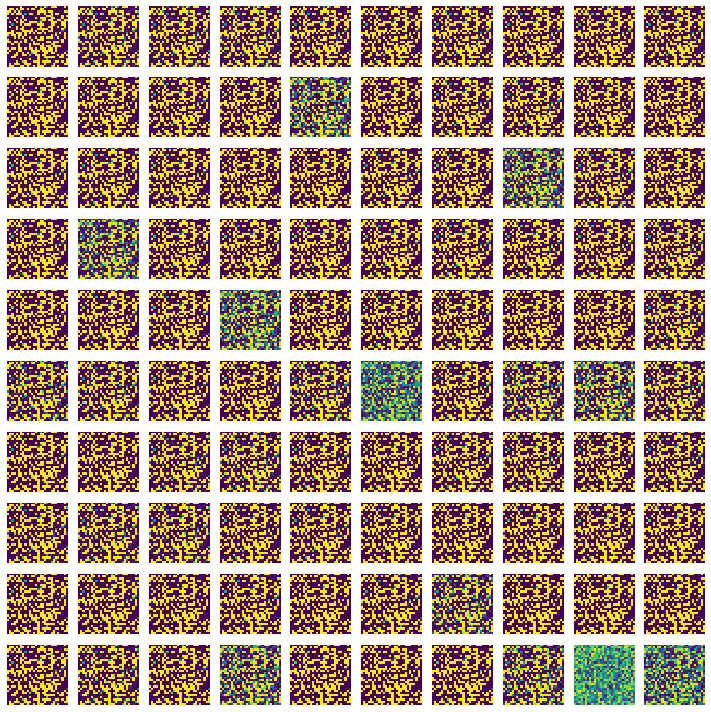

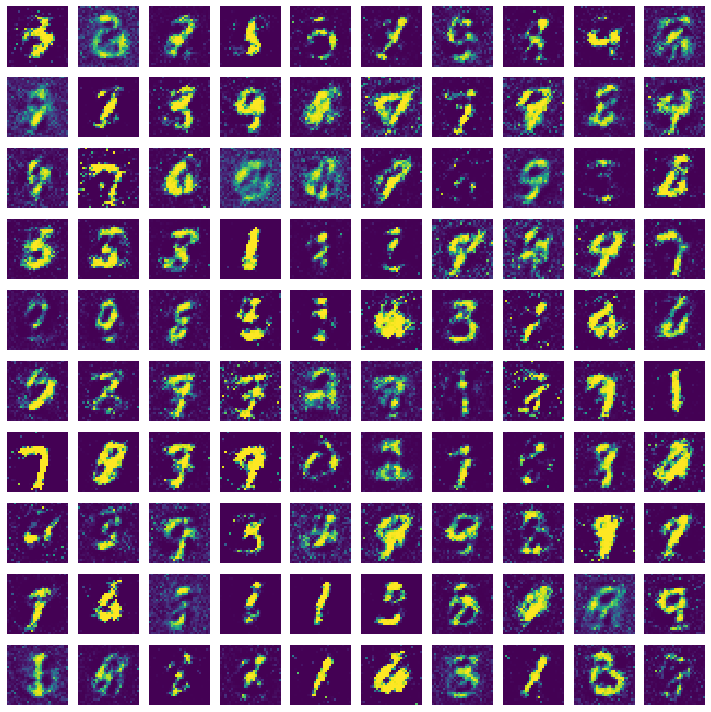

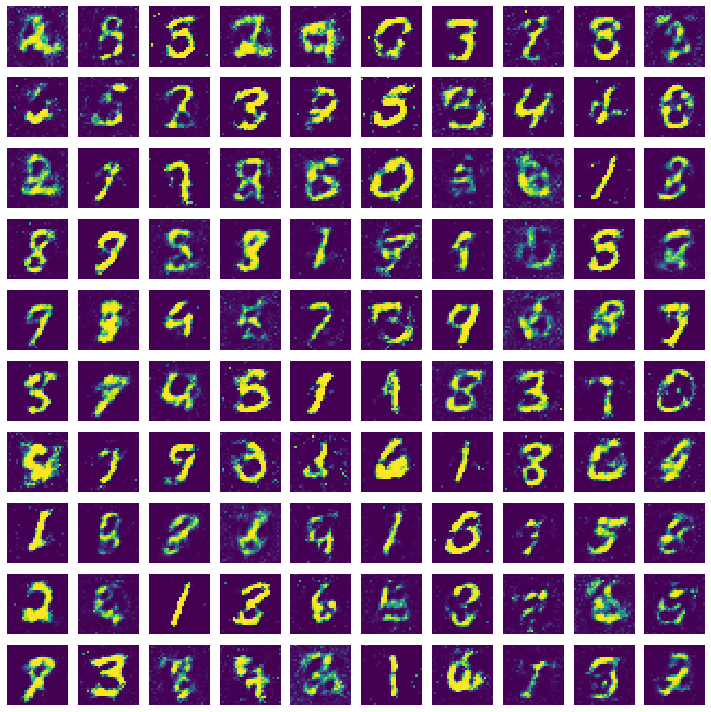

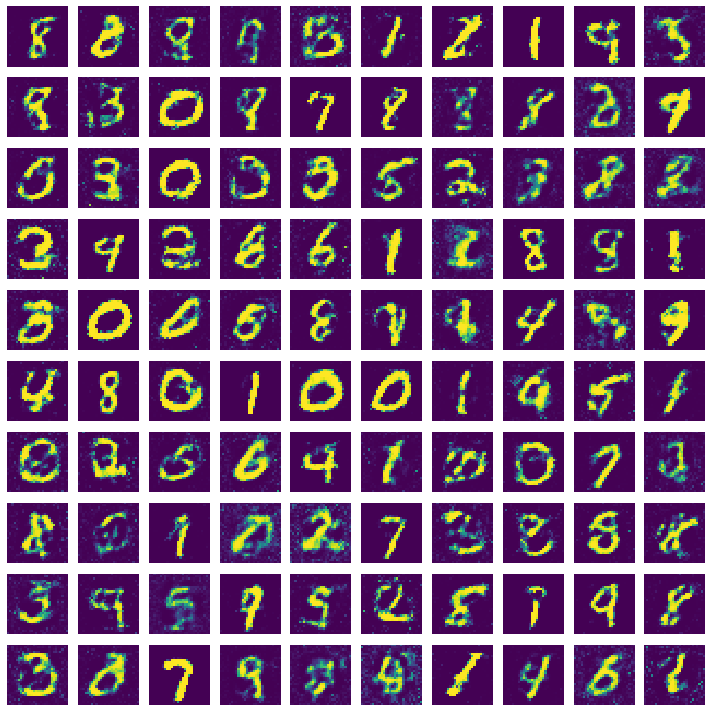

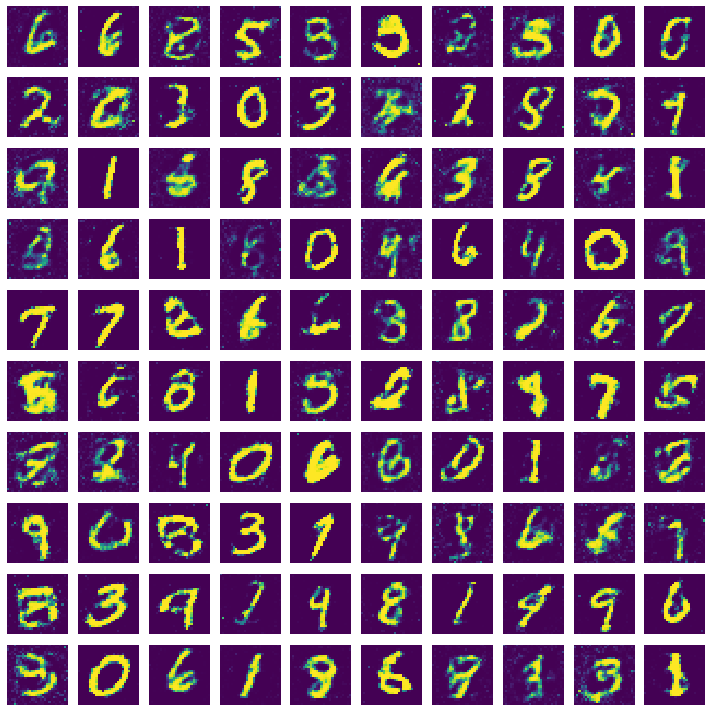

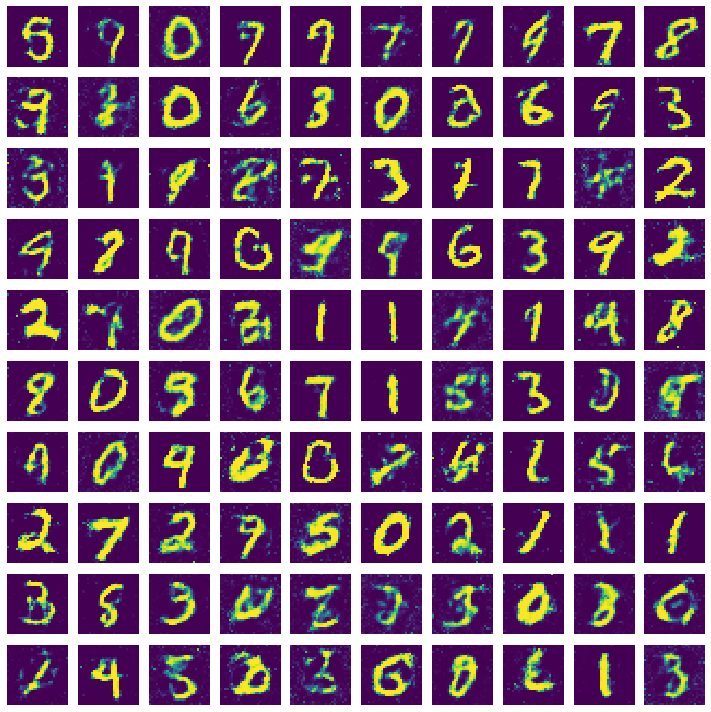

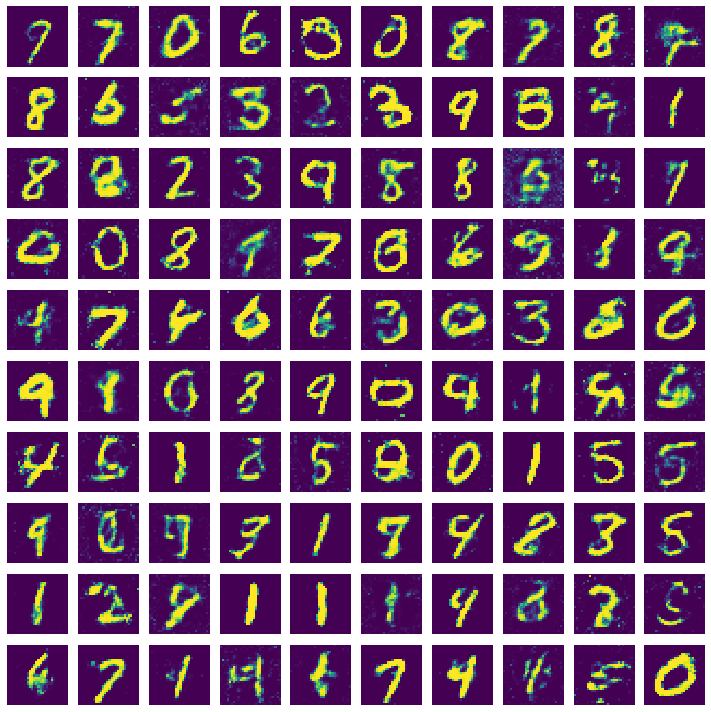

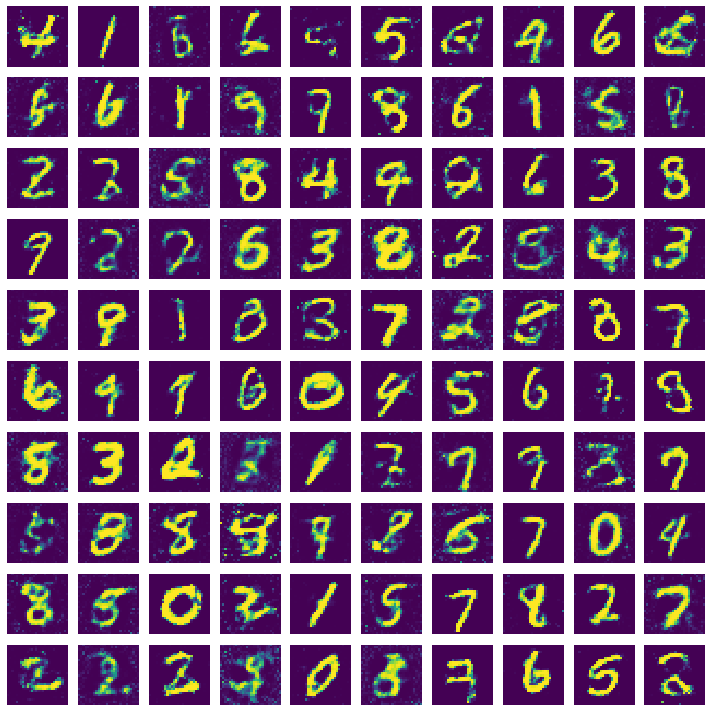

In [8]:

def training(epochs=1,batch_size=128):
  X_train,y_train,X_test,y_test=load_data()
  batch_count=X_train.shape[0]/batch_size
  gen=create_generator()
  dis=create_discriminator()
  gan=create_gan(dis,gen)
  for e in range(1,epochs+1):
    print("Epoch=",e)
    for _ in tqdm(range(batch_size)):
      noise=np.random.normal(0,1,[batch_size,100])
      generated_images=gen.predict(noise)
      image_batch=X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
      X=np.concatenate([image_batch,generated_images])
      y_dis=np.zeros(2*batch_size)
      y_dis[:batch_size]=0.9
      dis.trainable=True
      dis.train_on_batch(X,y_dis)
      noise=np.random.normal(0,1,[batch_size,100])
      y_gen=np.ones(batch_size)
      dis.trainable=False
      #training the gan by alternating the training of the discriminator
      #and training the chained gan model with the discriminator weights freezed
      gan.train_on_batch(noise,y_gen)
    if((e==1) or(e%20==0)):
       plot_generated_images1(e,gen)
training(140,128)

            

       

       
